# Loading data

In [1]:
import numpy as np
import pandas as pd
import glob
import json
import os
import random

import matplotlib.pyplot as plt
plt.style.use('ggplot')

In [2]:
root_path = os.path.abspath(os.getcwd())
metadata_path = f'{root_path}/metadata.csv'
# metadata_path = '/metadata.csv'
meta_df = pd.read_csv(metadata_path, dtype={
    'pubmed_id': str,
    'Microsoft Academic Paper ID': str, 
    'doi': str
})
meta_df.head()

/home/derekchan/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url
0,zjufx4fo,b2897e1277f56641193a6db73825f707eed3e4c9,PMC,Sequence requirements for RNA strand transfer ...,10.1093/emboj/20.24.7220,PMC125340,11742998,green-oa,Nidovirus subgenomic mRNAs contain a leader se...,2001-12-17,"Pasternak, Alexander O.; van den Born, Erwin; ...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/b2897e1277f56641193a6...,document_parses/pmc_json/PMC125340.xml.json,http://europepmc.org/articles/pmc125340?pdf=re...
1,ymceytj3,e3d0d482ebd9a8ba81c254cc433f314142e72174,PMC,"Crystal structure of murine sCEACAM1a[1,4]: a ...",10.1093/emboj/21.9.2076,PMC125375,11980704,green-oa,CEACAM1 is a member of the carcinoembryonic an...,2002-05-01,"Tan, Kemin; Zelus, Bruce D.; Meijers, Rob; Liu...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/e3d0d482ebd9a8ba81c25...,document_parses/pmc_json/PMC125375.xml.json,http://europepmc.org/articles/pmc125375?pdf=re...
2,wzj2glte,00b1d99e70f779eb4ede50059db469c65e8c1469,PMC,Synthesis of a novel hepatitis C virus protein...,10.1093/emboj/20.14.3840,PMC125543,11447125,no-cc,Hepatitis C virus (HCV) is an important human ...,2001-07-16,"Xu, Zhenming; Choi, Jinah; Yen, T.S.Benedict; ...",EMBO J,NaN,NaN,NaN,document_parses/pdf_json/00b1d99e70f779eb4ede5...,document_parses/pmc_json/PMC125543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,2sfqsfm1,cf584e00f637cbd8f1bb35f3f09f5ed07b71aeb0,PMC,Structure of coronavirus main proteinase revea...,10.1093/emboj/cdf327,PMC126080,12093723,green-oa,The key enzyme in coronavirus polyprotein proc...,2002-07-01,"Anand, Kanchan; Palm, Gottfried J.; Mesters, J...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/cf584e00f637cbd8f1bb3...,document_parses/pmc_json/PMC126080.xml.json,http://europepmc.org/articles/pmc126080?pdf=re...
4,i0zym7iq,dde02f11923815e6a16a31dd6298c46b109c5dfa,PMC,Discontinuous and non-discontinuous subgenomic...,10.1093/emboj/cdf635,PMC136939,12456663,green-oa,"Arteri-, corona-, toro- and roniviruses are ev...",2002-12-01,"van Vliet, A.L.W.; Smits, S.L.; Rottier, P.J.M...",The EMBO Journal,NaN,NaN,NaN,document_parses/pdf_json/dde02f11923815e6a16a3...,document_parses/pmc_json/PMC136939.xml.json,http://europepmc.org/articles/pmc136939?pdf=re...


In [3]:
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63571 entries, 0 to 63570
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cord_uid          63571 non-null  object 
 1   sha               48924 non-null  object 
 2   source_x          63571 non-null  object 
 3   title             63408 non-null  object 
 4   doi               59162 non-null  object 
 5   pmcid             49732 non-null  object 
 6   pubmed_id         42478 non-null  object 
 7   license           63571 non-null  object 
 8   abstract          51012 non-null  object 
 9   publish_time      63563 non-null  object 
 10  authors           60868 non-null  object 
 11  journal           55602 non-null  object 
 12  mag_id            970 non-null    float64
 13  who_covidence_id  1775 non-null   object 
 14  arxiv_id          1166 non-null   object 
 15  pdf_json_files    48924 non-null  object 
 16  pmc_json_files    33503 non-null  object

In [4]:
all_json = glob.glob(f'{root_path}/**/*.json', recursive=True)
len(all_json)

85371

In [5]:
with open(all_json[0]) as file:
    first_entry = json.load(file)
    print(json.dumps(first_entry, indent=4))

{
    "paper_id": "PMC4909826",
    "metadata": {
        "title": "TNF-\u03b1 \u2212\u00a0308 G\u00a0>\u00a0A and IFN-\u03b3 +\u00a0874 A\u00a0>\u00a0T gene polymorphisms in Egyptian patients with lupus erythematosus",
        "authors": [
            {
                "first": "Wfaa",
                "middle": [],
                "last": "Al-Kholy",
                "suffix": "",
                "email": null,
                "affiliation": {}
            },
            {
                "first": "Afaf",
                "middle": [],
                "last": "Elsaid",
                "suffix": "",
                "email": null,
                "affiliation": {}
            },
            {
                "first": "Aml",
                "middle": [],
                "last": "Sleem",
                "suffix": "",
                "email": null,
                "affiliation": {}
            },
            {
                "first": "Hend",
                "middle": [],
                "la

In [6]:
class FileReader:
    def __init__(self, file_path):
        with open(file_path) as file:
            content = json.load(file)
            self.paper_id = content['paper_id']
            self.abstract = []
            self.body_text = []
            # Abstract
            try:
                for entry in content['abstract']:
                    self.abstract.append(entry['text'])
            except:
                pass
            # Body text
            try:
                for entry in content['body_text']:
                    self.body_text.append(entry['text'])
            except:
                pass
            self.abstract = '\n'.join(self.abstract)
            self.body_text = '\n'.join(self.body_text)
    def __repr__(self):
        return f'{self.paper_id}: {self.abstract[:200]}... {self.body_text[:200]}...'
first_row = FileReader(all_json[0])
print(first_row)

PMC4909826: ... Systemic lupus erythematosus (SLE) is the prototypic autoimmune complex disease which is characterized by excessive production of autoantibodies against a broad range of self-antigens (Gurevitz et al....


In [7]:
def get_breaks(content, length):
    data = ""
    words = content.split(' ')
    total_chars = 0

    # add break every length characters
    for i in range(len(words)):
        total_chars += len(words[i])
        if total_chars > length:
            data = data + "<br>" + words[i]
            total_chars = 0
        else:
            data = data + " " + words[i]
    return data

In [8]:
all_json = random.sample(all_json, 20000)

In [9]:
dict_ = {'paper_id': [], 'doi':[], 'abstract': [], 'body_text': [], 'authors': [], 'title': [], 'journal': [], 'abstract_summary': []}
for idx, entry in enumerate(all_json):
    if idx % (len(all_json) // 10) == 0:
        print(f'Processing index: {idx} of {len(all_json)}')
    
    try:
        content = FileReader(entry)
    except Exception as e:
        continue  # invalid paper format, skip
    
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    # no metadata, skip this paper
    if len(meta_data) == 0:
        continue
    
    dict_['abstract'].append(content.abstract)
    dict_['paper_id'].append(content.paper_id)
    dict_['body_text'].append(content.body_text)
    
    # also create a column for the summary of abstract to be used in a plot
    if len(content.abstract) == 0: 
        # no abstract provided
        dict_['abstract_summary'].append("Not provided.")
    elif len(content.abstract.split(' ')) > 100:
        # abstract provided is too long for plot, take first 100 words append with ...
        info = content.abstract.split(' ')[:100]
        summary = get_breaks(' '.join(info), 40)
        dict_['abstract_summary'].append(summary + "...")
    else:
        # abstract is short enough
        summary = get_breaks(content.abstract, 40)
        dict_['abstract_summary'].append(summary)
        
    # get metadata information
    meta_data = meta_df.loc[meta_df['sha'] == content.paper_id]
    
    try:
        # if more than one author
        authors = meta_data['authors'].values[0].split(';')
        if len(authors) > 2:
            # if more than 2 authors, take them all with html tag breaks in between
            dict_['authors'].append(get_breaks('. '.join(authors), 40))
        else:
            # authors will fit in plot
            dict_['authors'].append(". ".join(authors))
    except Exception as e:
        # if only one author - or Null valie
        dict_['authors'].append(meta_data['authors'].values[0])
    
    # add the title information, add breaks when needed
    try:
        title = get_breaks(meta_data['title'].values[0], 40)
        dict_['title'].append(title)
    # if title was not provided
    except Exception as e:
        dict_['title'].append(meta_data['title'].values[0])
    
    # add the journal information
    dict_['journal'].append(meta_data['journal'].values[0])
    
    # add doi
    dict_['doi'].append(meta_data['doi'].values[0])
    
df_covid = pd.DataFrame(dict_, columns=['paper_id', 'doi', 'abstract', 'body_text', 'authors', 'title', 'journal', 'abstract_summary'])
df_covid.head()

Processing index: 0 of 20000
Processing index: 2000 of 20000
Processing index: 4000 of 20000
Processing index: 6000 of 20000
Processing index: 8000 of 20000
Processing index: 10000 of 20000
Processing index: 12000 of 20000
Processing index: 14000 of 20000
Processing index: 16000 of 20000
Processing index: 18000 of 20000


,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary
0,f2df4fc3c60338755fd23da3d7e01c0455e20745,10.1128/genomea.00815-13,Infectious bronchitis virus (IBV) causes treme...,tagious and acute disease in domestic chickens...,"Yang, Jing-tian. Ma, Bing-cun",Complete Genome Sequence of a<br>Nephropathog...,Genome Announc,Infectious bronchitis virus (IBV) causes<br>t...
1,044d1e54d0a62dcd6234694e2a7ce1aa48fa7601,10.1016/j.tmaid.2020.101571,,Travel Medicine and Infectious Disease journal...,"Rahman Qureshi, Ubaid Ur. Saleem, Sadia. Kh...",Outbreak of novel Corona virus (2019-nCoV);<b...,Travel Medicine and Infectious Disease,Not provided.
2,90bee22c1c7575cc0cfe57ae02cf0197159e9519,10.1053/j.tcam.2011.02.005,The panel of laboratory tests available for di...,G astrointestinal (GI) and pancreatic diseases...,"Dossin, Olivier",Laboratory Tests for Diagnosis of<br>Gastroin...,Top Companion Anim Med,The panel of laboratory tests available for<b...
3,3e6dda036f3d57c4b1b5b318225ce2a1fccb6ab7,10.1101/2020.03.09.20033126,"Coronavirus disease 2019 , caused by SARS-CoV-...",Corona virus disease 2019 (COVID-19) has rapid...,Yu Lei. yunping lan. jianli lu. xiaobo hua...,Clinical features of imported cases of<br>cor...,NaN,"Coronavirus disease 2019 , caused by<br>SARS-..."
4,54b4d23bdc0456147c7828b1c196a8616e556bf8,10.1007/s00705-019-04226-9,Rabbits are widely used as models in biologica...,An appropriate animal model is crucial for mim...,"Wu, Miaoli. Ma, Lei. Cong, Feng. Zhu, Yuju...",High-throughput Luminex xMAP assay for<br>sim...,Arch Virol,Rabbits are widely used as models in biologic...


In [10]:
df_covid['abstract_word_count'] = df_covid['abstract'].apply(lambda x: len(x.strip().split()))  # word count in abstract
df_covid['body_word_count'] = df_covid['body_text'].apply(lambda x: len(x.strip().split()))  # word count in body
df_covid['body_unique_words'] = df_covid['body_text'].apply(lambda x:len(set(str(x).split())))  # number of unique words in body
df_covid.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words
0,f2df4fc3c60338755fd23da3d7e01c0455e20745,10.1128/genomea.00815-13,Infectious bronchitis virus (IBV) causes treme...,tagious and acute disease in domestic chickens...,"Yang, Jing-tian. Ma, Bing-cun",Complete Genome Sequence of a<br>Nephropathog...,Genome Announc,Infectious bronchitis virus (IBV) causes<br>t...,41,528,268
1,044d1e54d0a62dcd6234694e2a7ce1aa48fa7601,10.1016/j.tmaid.2020.101571,,Travel Medicine and Infectious Disease journal...,"Rahman Qureshi, Ubaid Ur. Saleem, Sadia. Kh...",Outbreak of novel Corona virus (2019-nCoV);<b...,Travel Medicine and Infectious Disease,Not provided.,0,557,324
2,90bee22c1c7575cc0cfe57ae02cf0197159e9519,10.1053/j.tcam.2011.02.005,The panel of laboratory tests available for di...,G astrointestinal (GI) and pancreatic diseases...,"Dossin, Olivier",Laboratory Tests for Diagnosis of<br>Gastroin...,Top Companion Anim Med,The panel of laboratory tests available for<b...,214,6375,1712
3,3e6dda036f3d57c4b1b5b318225ce2a1fccb6ab7,10.1101/2020.03.09.20033126,"Coronavirus disease 2019 , caused by SARS-CoV-...",Corona virus disease 2019 (COVID-19) has rapid...,Yu Lei. yunping lan. jianli lu. xiaobo hua...,Clinical features of imported cases of<br>cor...,NaN,"Coronavirus disease 2019 , caused by<br>SARS-...",281,1809,654
4,54b4d23bdc0456147c7828b1c196a8616e556bf8,10.1007/s00705-019-04226-9,Rabbits are widely used as models in biologica...,An appropriate animal model is crucial for mim...,"Wu, Miaoli. Ma, Lei. Cong, Feng. Zhu, Yuju...",High-throughput Luminex xMAP assay for<br>sim...,Arch Virol,Rabbits are widely used as models in biologic...,222,2444,909


In [11]:
df_covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10980 entries, 0 to 10979
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             10980 non-null  object
 1   doi                  10690 non-null  object
 2   abstract             10980 non-null  object
 3   body_text            10980 non-null  object
 4   authors              10815 non-null  object
 5   title                10971 non-null  object
 6   journal              9936 non-null   object
 7   abstract_summary     10980 non-null  object
 8   abstract_word_count  10980 non-null  int64 
 9   body_word_count      10980 non-null  int64 
 10  body_unique_words    10980 non-null  int64 
dtypes: int64(3), object(8)
memory usage: 943.7+ KB


In [12]:
df_covid['abstract'].describe(include='all')

count     10980
unique     7744
top            
freq       3229
Name: abstract, dtype: object

In [13]:
df_covid.drop_duplicates(['abstract', 'body_text'], inplace=True)
df_covid['abstract'].describe(include='all')

count     10978
unique     7744
top            
freq       3228
Name: abstract, dtype: object

In [14]:
df_covid['body_text'].describe(include='all')

count                               10978
unique                              10977
top       J o u r n a l P r e -p r o o f 
freq                                    2
Name: body_text, dtype: object

In [15]:
df_covid.head()

,paper_id,doi,abstract,body_text,authors,title,journal,abstract_summary,abstract_word_count,body_word_count,body_unique_words
0,f2df4fc3c60338755fd23da3d7e01c0455e20745,10.1128/genomea.00815-13,Infectious bronchitis virus (IBV) causes treme...,tagious and acute disease in domestic chickens...,"Yang, Jing-tian. Ma, Bing-cun",Complete Genome Sequence of a<br>Nephropathog...,Genome Announc,Infectious bronchitis virus (IBV) causes<br>t...,41,528,268
1,044d1e54d0a62dcd6234694e2a7ce1aa48fa7601,10.1016/j.tmaid.2020.101571,,Travel Medicine and Infectious Disease journal...,"Rahman Qureshi, Ubaid Ur. Saleem, Sadia. Kh...",Outbreak of novel Corona virus (2019-nCoV);<b...,Travel Medicine and Infectious Disease,Not provided.,0,557,324
2,90bee22c1c7575cc0cfe57ae02cf0197159e9519,10.1053/j.tcam.2011.02.005,The panel of laboratory tests available for di...,G astrointestinal (GI) and pancreatic diseases...,"Dossin, Olivier",Laboratory Tests for Diagnosis of<br>Gastroin...,Top Companion Anim Med,The panel of laboratory tests available for<b...,214,6375,1712
3,3e6dda036f3d57c4b1b5b318225ce2a1fccb6ab7,10.1101/2020.03.09.20033126,"Coronavirus disease 2019 , caused by SARS-CoV-...",Corona virus disease 2019 (COVID-19) has rapid...,Yu Lei. yunping lan. jianli lu. xiaobo hua...,Clinical features of imported cases of<br>cor...,NaN,"Coronavirus disease 2019 , caused by<br>SARS-...",281,1809,654
4,54b4d23bdc0456147c7828b1c196a8616e556bf8,10.1007/s00705-019-04226-9,Rabbits are widely used as models in biologica...,An appropriate animal model is crucial for mim...,"Wu, Miaoli. Ma, Lei. Cong, Feng. Zhu, Yuju...",High-throughput Luminex xMAP assay for<br>sim...,Arch Virol,Rabbits are widely used as models in biologic...,222,2444,909


In [16]:
df_covid.describe()

,abstract_word_count,body_word_count,body_unique_words
count,10978.000000,10978.000000,10978.000000
mean,154.411186,4500.227728,1359.105119
std,172.953506,7918.207368,1245.228154
min,0.000000,1.000000,1.000000
25%,0.000000,2085.000000,819.000000
50%,150.000000,3420.500000,1174.000000
75%,232.000000,5224.250000,1621.000000
max,4057.000000,268982.000000,35875.000000


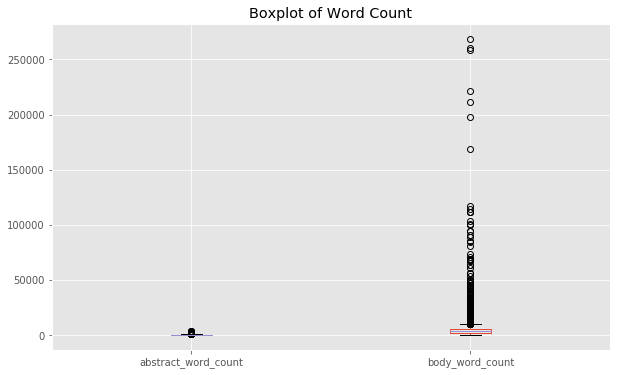

In [17]:
df_covid[['abstract_word_count', 'body_word_count']].plot(kind='box', title='Boxplot of Word Count', figsize=(10,6))
plt.show()

# Data pre-processing

In [18]:
#rename to df for ease of use
# df = df_covid.sample(20000, random_state=42)
df = df_covid
del df_covid

In [19]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9720 entries, 0 to 10979
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             9720 non-null   object
 1   doi                  9720 non-null   object
 2   abstract             9720 non-null   object
 3   body_text            9720 non-null   object
 4   authors              9720 non-null   object
 5   title                9720 non-null   object
 6   journal              9720 non-null   object
 7   abstract_summary     9720 non-null   object
 8   abstract_word_count  9720 non-null   int64 
 9   body_word_count      9720 non-null   int64 
 10  body_unique_words    9720 non-null   int64 
dtypes: int64(3), object(8)
memory usage: 911.2+ KB


In [20]:
from tqdm import tqdm
from langdetect import detect
from langdetect import DetectorFactory

# set seed
DetectorFactory.seed = 0

# hold label - language
languages = []

# go through each text
for ii in tqdm(range(0,len(df))):
    # split by space into list, take the first x intex, join with space
    text = df.iloc[ii]['body_text'].split(" ")
    
    lang = "en"
    try:
        if len(text) > 50:
            lang = detect(" ".join(text[:50]))
        elif len(text) > 0:
            lang = detect(" ".join(text[:len(text)]))
    # ught... beginning of the document was not in a good format
    except Exception as e:
        all_words = set(text)
        try:
            lang = detect(" ".join(all_words))
        # what!! :( let's see if we can find any text in abstract...
        except Exception as e:
            
            try:
                # let's try to label it through the abstract then
                lang = detect(df.iloc[ii]['abstract_summary'])
            except Exception as e:
                lang = "unknown"
                pass
    
    # get the language    
    languages.append(lang)

100%|██████████| 9720/9720 [01:00<00:00, 160.09it/s]


In [21]:
from pprint import pprint

languages_dict = {}
for lang in set(languages):
    languages_dict[lang] = languages.count(lang)
    
print("Total: {}\n".format(len(languages)))
pprint(languages_dict)

Total: 9720

{'af': 1,
 'ca': 1,
 'cy': 5,
 'de': 35,
 'en': 9475,
 'es': 84,
 'fr': 100,
 'it': 4,
 'nl': 12,
 'pt': 3}


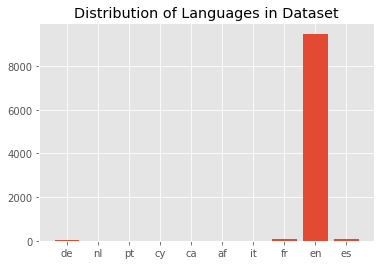

In [22]:
df['language'] = languages
plt.bar(range(len(languages_dict)), list(languages_dict.values()), align='center')
plt.xticks(range(len(languages_dict)), list(languages_dict.keys()))
plt.title("Distribution of Languages in Dataset")
plt.show()

In [23]:
df = df[df['language'] == 'en'] 
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9475 entries, 0 to 10979
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   paper_id             9475 non-null   object
 1   doi                  9475 non-null   object
 2   abstract             9475 non-null   object
 3   body_text            9475 non-null   object
 4   authors              9475 non-null   object
 5   title                9475 non-null   object
 6   journal              9475 non-null   object
 7   abstract_summary     9475 non-null   object
 8   abstract_word_count  9475 non-null   int64 
 9   body_word_count      9475 non-null   int64 
 10  body_unique_words    9475 non-null   int64 
 11  language             9475 non-null   object
dtypes: int64(3), object(9)
memory usage: 962.3+ KB


In [24]:
# from IPython.utils import io

# with io.capture_output() as captured:
#     !pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.2.4/en_core_sci_lg-0.2.4.tar.gz 

In [25]:
#NLP 
import spacy
from spacy.lang.en.stop_words import STOP_WORDS
import en_core_sci_lg

In [26]:
import string

punctuations = string.punctuation
stopwords = list(STOP_WORDS)
stopwords[:10]

['fifty',
 'becoming',
 'while',
 'two',
 'which',
 'must',
 'bottom',
 'amount',
 '’d',
 'of']

In [27]:
custom_stop_words = [
    'doi', 'preprint', 'copyright', 'peer', 'reviewed', 'org', 'https', 'et', 'al', 'author', 'figure', 
    'rights', 'reserved', 'permission', 'used', 'using', 'biorxiv', 'medrxiv', 'license', 'fig', 'fig.', 
    'al.', 'Elsevier', 'PMC', 'CZI', 'www'
]

for w in custom_stop_words:
    if w not in stopwords:
        stopwords.append(w)

In [28]:
# Parser
parser = en_core_sci_lg.load(disable=["tagger", "ner"])
parser.max_length = 7000000

def spacy_tokenizer(sentence):
    mytokens = parser(sentence)
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]
    mytokens = [ word for word in mytokens if word not in stopwords and word not in punctuations ]
    mytokens = " ".join([i for i in mytokens])
    return mytokens

In [29]:
tqdm.pandas()
df["processed_text"] = df["body_text"].progress_apply(spacy_tokenizer)

/home/derekchan/anaconda3/lib/python3.7/site-packages/tqdm/std.py:666: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|██████████| 9475/9475 [57:45<00:00,  2.73it/s]  


In [30]:
import seaborn as sns

count      9475.000000
mean       4326.698047
std        4572.504310
min           6.000000
25%        2191.500000
50%        3502.000000
75%        5304.500000
max      114337.000000
Name: body_word_count, dtype: float64

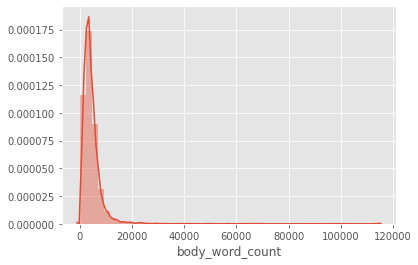

In [31]:
sns.distplot(df['body_word_count'])
df['body_word_count'].describe()

count     9475.000000
mean      1352.562427
std        905.159468
min          6.000000
25%        855.000000
50%       1205.000000
75%       1650.500000
max      15676.000000
Name: body_unique_words, dtype: float64

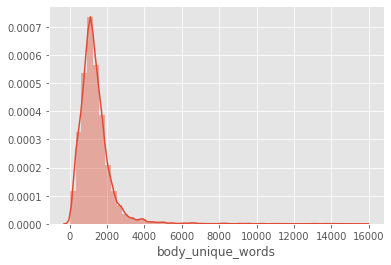

In [32]:
sns_plot = sns.distplot(df['body_unique_words'])
sns_plot.get_figure().savefig('body_unique_words.png')
df['body_unique_words'].describe()

# Vectorization

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer
def vectorize(text, maxx_features):
    vectorizer = TfidfVectorizer(max_features=maxx_features)
    X = vectorizer.fit_transform(text)
    return X

In [34]:
text = df['processed_text'].values
X = vectorize(text, 2 ** 12)
X.shape

(9475, 4096)

# PCA

In [35]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95, random_state=42)
X_reduced= pca.fit_transform(X.toarray())
X_reduced.shape

(9475, 2212)

In [36]:
from sklearn.cluster import KMeans

In [37]:
# Image(filename='resources/kmeans.png', width=800, height=800)

In [38]:
from sklearn import metrics
from scipy.spatial.distance import cdist

# run kmeans with many different k
distortions = []
K = range(2, 50)
for k in K:
    k_means = KMeans(n_clusters=k, random_state=42, n_jobs=-1).fit(X_reduced)
    distortions.append(sum(np.min(cdist(X_reduced, k_means.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    print('Found distortion for {} clusters'.format(k))

Found distortion for 2 clusters
Found distortion for 3 clusters
Found distortion for 4 clusters
Found distortion for 5 clusters
Found distortion for 6 clusters
Found distortion for 7 clusters
Found distortion for 8 clusters
Found distortion for 9 clusters
Found distortion for 10 clusters
Found distortion for 11 clusters
Found distortion for 12 clusters
Found distortion for 13 clusters
Found distortion for 14 clusters
Found distortion for 15 clusters
Found distortion for 16 clusters
Found distortion for 17 clusters
Found distortion for 18 clusters
Found distortion for 19 clusters
Found distortion for 20 clusters
Found distortion for 21 clusters
Found distortion for 22 clusters
Found distortion for 23 clusters
Found distortion for 24 clusters
Found distortion for 25 clusters
Found distortion for 26 clusters
Found distortion for 27 clusters
Found distortion for 28 clusters
Found distortion for 29 clusters
Found distortion for 30 clusters
Found distortion for 31 clusters
Found distortion f

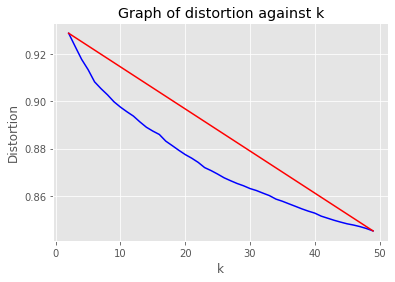

<Figure size 432x288 with 0 Axes>

In [39]:
X_line = [K[0], K[-1]]
Y_line = [distortions[0], distortions[-1]]

# Plot the elbow
plt.plot(K, distortions, 'b-')
plt.plot(X_line, Y_line, 'r')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('Graph of distortion against k')
plt.show()
plt.savefig("elbow.png")

In [40]:
k = 20
kmeans = KMeans(n_clusters=k, random_state=42, n_jobs=-1)
y_pred = kmeans.fit_predict(X_reduced)
df['y'] = y_pred

In [42]:
from sklearn.manifold import TSNE

tsne = TSNE(verbose=1, perplexity=100, random_state=42)
X_embedded = tsne.fit_transform(X.toarray())

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 9475 samples in 7.697s...
[t-SNE] Computed neighbors for 9475 samples in 652.733s...
[t-SNE] Computed conditional probabilities for sample 1000 / 9475
[t-SNE] Computed conditional probabilities for sample 2000 / 9475
[t-SNE] Computed conditional probabilities for sample 3000 / 9475
[t-SNE] Computed conditional probabilities for sample 4000 / 9475
[t-SNE] Computed conditional probabilities for sample 5000 / 9475
[t-SNE] Computed conditional probabilities for sample 6000 / 9475
[t-SNE] Computed conditional probabilities for sample 7000 / 9475
[t-SNE] Computed conditional probabilities for sample 8000 / 9475
[t-SNE] Computed conditional probabilities for sample 9000 / 9475
[t-SNE] Computed conditional probabilities for sample 9475 / 9475
[t-SNE] Mean sigma: 0.370113
[t-SNE] KL divergence after 50 iterations with early exaggeration: 81.835907
[t-SNE] KL divergence after 1000 iterations: 1.837214


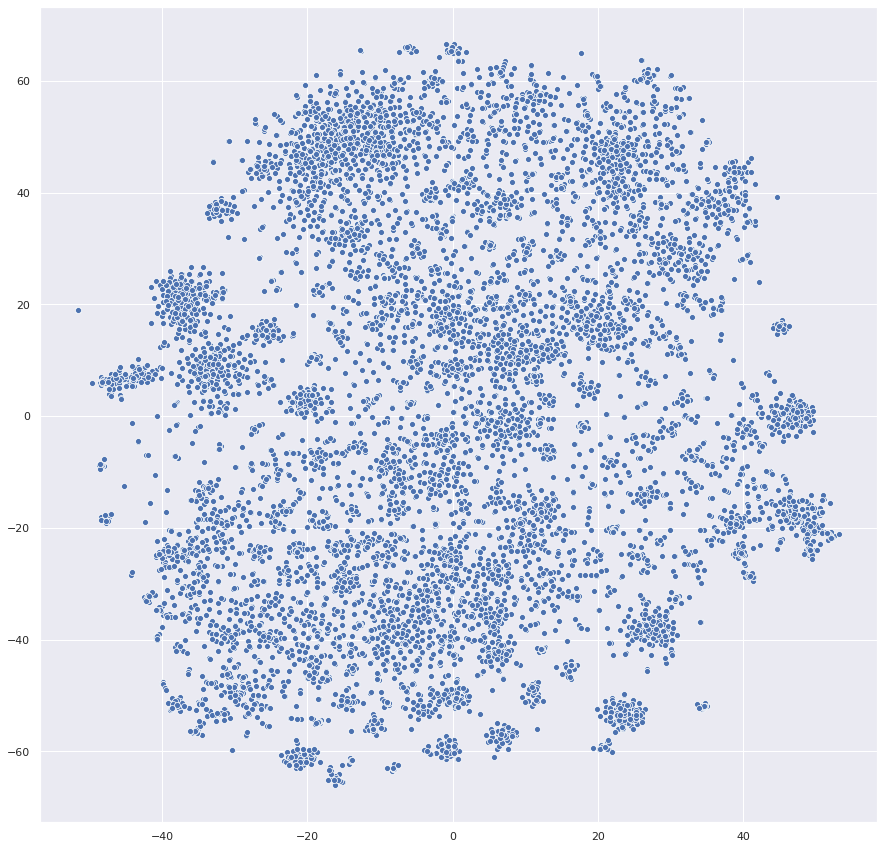

In [43]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15,15)})

# colors
palette = sns.color_palette("bright", 1)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], palette=palette)
# plt.title('t-SNE with no Labels')
plt.savefig("t-sne_covid19.png")
plt.show()

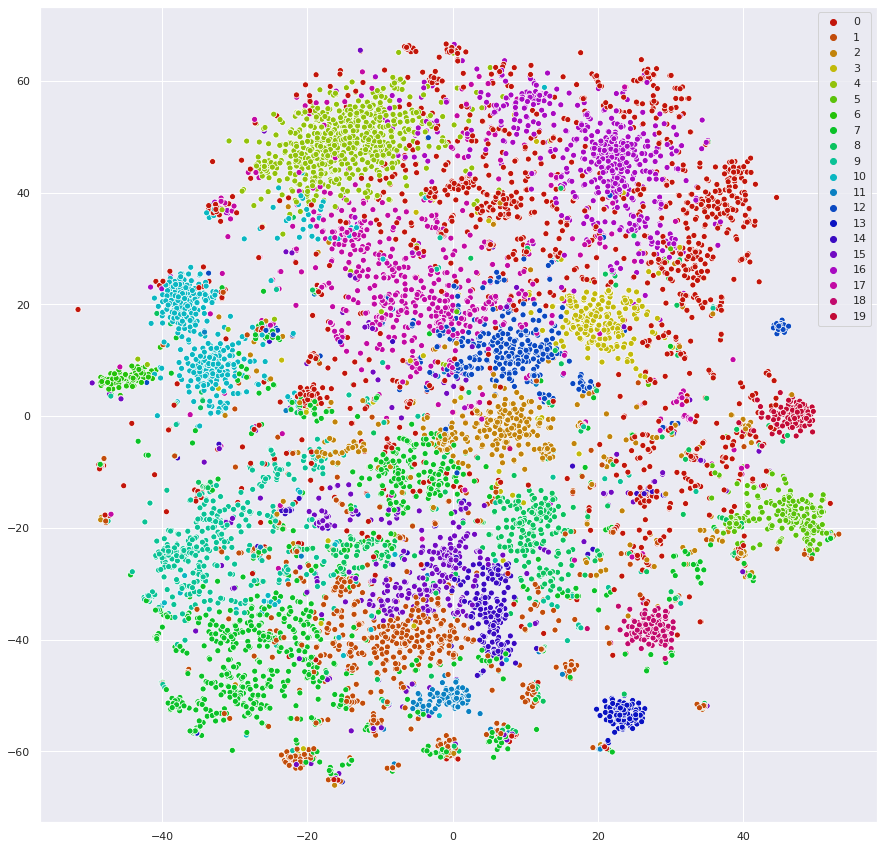

In [44]:
from matplotlib import pyplot as plt
import seaborn as sns

# sns settings
sns.set(rc={'figure.figsize':(15, 15)})

# colors
palette = sns.hls_palette(20, l=.4, s=.9)

# plot
sns.scatterplot(X_embedded[:,0], X_embedded[:,1], hue=y_pred, legend='full', palette=palette)
# plt.title('t-SNE with Kmeans Labels')
plt.savefig("improved_cluster_tsne.png")
plt.show()

# LDA

In [45]:
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer

In [46]:
vectorizers = []
    
for ii in range(0, 20):
    # Creating a vectorizer
    vectorizers.append(CountVectorizer(min_df=5, max_df=0.9, stop_words='english', lowercase=True, token_pattern='[a-zA-Z\-][a-zA-Z\-]{2,}'))

In [47]:
vectorizers[0]

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=0.9, max_features=None, min_df=5,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='[a-zA-Z\\-][a-zA-Z\\-]{2,}',
                tokenizer=None, vocabulary=None)

In [48]:
vectorized_data = []

for current_cluster, cvec in enumerate(vectorizers):
    try:
        vectorized_data.append(cvec.fit_transform(df.loc[df['y'] == current_cluster, 'processed_text']))
    except Exception as e:
        print("Not enough instances in cluster: " + str(current_cluster))
        vectorized_data.append(None)

In [49]:
len(vectorized_data)

20

In [63]:
# number of topics per cluster
NUM_TOPICS_PER_CLUSTER = 5

lda_models = []
for ii in range(0, 20):
    # Latent Dirichlet Allocation Model
    lda = LatentDirichletAllocation(n_components=NUM_TOPICS_PER_CLUSTER, max_iter=10, learning_method='online',verbose=False, random_state=42)
    lda_models.append(lda)
    
lda_models[0]

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='online', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=False)

In [64]:
clusters_lda_data = []

for current_cluster, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_cluster))
    
    if vectorized_data[current_cluster] != None:
        clusters_lda_data.append((lda.fit_transform(vectorized_data[current_cluster])))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5
Current Cluster: 6
Current Cluster: 7
Current Cluster: 8
Current Cluster: 9
Current Cluster: 10
Current Cluster: 11
Current Cluster: 12
Current Cluster: 13
Current Cluster: 14
Current Cluster: 15
Current Cluster: 16
Current Cluster: 17
Current Cluster: 18
Current Cluster: 19


In [65]:
# Functions for printing keywords for each topic
def selected_topics(model, vectorizer, top_n=3):
    current_words = []
    keywords = []
    
    for idx, topic in enumerate(model.components_):
        words = [(vectorizer.get_feature_names()[i], topic[i]) for i in topic.argsort()[:-top_n - 1:-1]]
        for word in words:
            if word[0] not in current_words:
                keywords.append(word)
                current_words.append(word[0])
                
    keywords.sort(key = lambda x: x[1])  
    keywords.reverse()
    return_values = []
    for ii in keywords:
        return_values.append(ii[0])
    return return_values

In [66]:
all_keywords = []
for current_vectorizer, lda in enumerate(lda_models):
    print("Current Cluster: " + str(current_vectorizer))

    if vectorized_data[current_vectorizer] != None:
        all_keywords.append(selected_topics(lda, vectorizers[current_vectorizer]))

Current Cluster: 0
Current Cluster: 1
Current Cluster: 2
Current Cluster: 3
Current Cluster: 4
Current Cluster: 5
Current Cluster: 6
Current Cluster: 7
Current Cluster: 8
Current Cluster: 9
Current Cluster: 10
Current Cluster: 11
Current Cluster: 12
Current Cluster: 13
Current Cluster: 14
Current Cluster: 15
Current Cluster: 16
Current Cluster: 17
Current Cluster: 18
Current Cluster: 19


In [54]:
all_keywords[0][:10]

['model',
 'data',
 'virus',
 'species',
 'study',
 'air',
 'number',
 'disease',
 'health',
 'viruses']

In [67]:
len(all_keywords)

20

In [68]:
f=open('topics5.txt','w')

count = 0

for ii in all_keywords:

    if vectorized_data[count] != None:
        f.write(', '.join(ii) + "\n")
    else:
        f.write("Not enough instances to be determined. \n")
        f.write(', '.join(ii) + "\n")
    count += 1

f.close()

In [57]:
import pickle

# save the COVID-19 DataFrame, too large for github
pickle.dump(df, open("df_covid.p", "wb" ))

# save the final t-SNE
pickle.dump(X_embedded, open("X_embedded.p", "wb" ))

# save the labels generate with k-means(20)
pickle.dump(y_pred, open("y_pred.p", "wb" ))

# Metrics

In [58]:
# function to print out classification model report
def classification_report(model_name, test, pred):
    from sklearn.metrics import precision_score, recall_score
    from sklearn.metrics import accuracy_score
    from sklearn.metrics import f1_score
    
    print(model_name, ":\n")
    print("Accuracy Score: ", '{:,.3f}'.format(float(accuracy_score(test, pred)) * 100), "%")
    print("     Precision: ", '{:,.3f}'.format(float(precision_score(test, pred, average='macro')) * 100), "%")
    print("        Recall: ", '{:,.3f}'.format(float(recall_score(test, pred, average='macro')) * 100), "%")
    print("      F1 score: ", '{:,.3f}'.format(float(f1_score(test, pred, average='macro')) * 100), "%")

In [59]:
from sklearn.model_selection import train_test_split

# test set size of 20% of the data and the random seed 42 <3
X_train, X_test, y_train, y_test = train_test_split(X.toarray(),y_pred, test_size=0.2, random_state=42)

print("X_train size:", len(X_train))
print("X_test size:", len(X_test), "\n")

X_train size: 7580
X_test size: 1895 



In [60]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import SGDClassifier

# SGD instance
sgd_clf = SGDClassifier(max_iter=10000, tol=1e-3, random_state=42, n_jobs=-1)
# train SGD
sgd_clf.fit(X_train, y_train)

# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_train, y_train, cv=3, n_jobs=-1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_train, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  89.683 %
     Precision:  90.822 %
        Recall:  90.464 %
      F1 score:  90.590 %


In [61]:
# cross validation predictions
sgd_pred = cross_val_predict(sgd_clf, X_test, y_test, cv=3, n_jobs=-1)

# print out the classification report
classification_report("Stochastic Gradient Descent Report (Training Set)", y_test, sgd_pred)

Stochastic Gradient Descent Report (Training Set) :

Accuracy Score:  84.169 %
     Precision:  87.119 %
        Recall:  84.708 %
      F1 score:  85.672 %


In [62]:
sgd_cv_score = cross_val_score(sgd_clf, X.toarray(), y_pred, cv=10)
print("Mean cv Score - SGD: {:,.3f}".format(float(sgd_cv_score.mean()) * 100), "%")

Mean cv Score - SGD: 90.639 %
